In [1]:
import pandas as pd
from code.gru.gru import gru
from code.parser.parse import Parser
from code.gru.gru import GRUModel
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from code.wiener_kolmogorov.wiener_kolmogorov import WienerKolmogorov as WK
from code.detector.detector import  Detector
import numpy as np
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../../runs/3/office.csv')
df = df[:2100]
df = df[["RSSI"]]

window = 300
zeros = np.zeros(window)
ones = np.ones(window)
y = ones
l = len(ones) + window
f = True
while l <= 2100:
    if f:
        y = np.concatenate((y, zeros))
        f = False
    else:
        y = np.concatenate((y, ones))
        f = True
    l += window



In [3]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [4]:
num_steps = 500
X, y = lstm_data_transform(df["RSSI"].to_numpy(), y, num_steps=num_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.285)
print ("The new shape of x is", X.shape)

The new shape of x is (1600, 500)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GRU, SimpleRNN, Activation
from keras.layers import Dropout
from keras.regularizers import l2
import numpy as np
from keras import optimizers

model = Sequential()
model.add(GRU(200, activation='tanh', input_shape=(num_steps, 1),
               return_sequences=False))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer="adam", loss='mse')


In [6]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
36/36 [==============================] - 14s 366ms/step - loss: 0.3602
Epoch 2/10
36/36 [==============================] - 13s 370ms/step - loss: 0.1982
Epoch 3/10
36/36 [==============================] - 13s 368ms/step - loss: 0.1478
Epoch 4/10
36/36 [==============================] - 13s 368ms/step - loss: 0.1211
Epoch 5/10
36/36 [==============================] - 13s 370ms/step - loss: 0.1077
Epoch 6/10
36/36 [==============================] - 13s 368ms/step - loss: 0.0969
Epoch 7/10
36/36 [==============================] - 13s 368ms/step - loss: 0.1004
Epoch 8/10
36/36 [==============================] - 13s 367ms/step - loss: 0.1008
Epoch 9/10
36/36 [==============================] - 13s 372ms/step - loss: 0.1023
Epoch 10/10
36/36 [==============================] - 13s 372ms/step - loss: 0.0891


In [15]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
36/36 [==============================] - 13s 374ms/step - loss: 0.0795
Epoch 2/10
36/36 [==============================] - 13s 369ms/step - loss: 0.0633
Epoch 3/10
36/36 [==============================] - 13s 368ms/step - loss: 0.0557
Epoch 4/10
36/36 [==============================] - 13s 371ms/step - loss: 0.0695
Epoch 5/10
36/36 [==============================] - 13s 370ms/step - loss: 0.0621
Epoch 6/10
36/36 [==============================] - 13s 369ms/step - loss: 0.0496
Epoch 7/10
36/36 [==============================] - 13s 368ms/step - loss: 0.0412
Epoch 8/10
36/36 [==============================] - 13s 370ms/step - loss: 0.0480
Epoch 9/10
36/36 [==============================] - 13s 367ms/step - loss: 0.0580
Epoch 10/10
36/36 [==============================] - 13s 369ms/step - loss: 0.0454


In [16]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
36/36 [==============================] - 15s 409ms/step - loss: 0.0430
Epoch 2/10
36/36 [==============================] - 14s 375ms/step - loss: 0.0369
Epoch 3/10
36/36 [==============================] - 13s 370ms/step - loss: 0.0363
Epoch 4/10
36/36 [==============================] - 13s 368ms/step - loss: 0.0438
Epoch 5/10
36/36 [==============================] - 13s 368ms/step - loss: 0.0438
Epoch 6/10
36/36 [==============================] - 13s 368ms/step - loss: 0.0352
Epoch 7/10
36/36 [==============================] - 13s 369ms/step - loss: 0.0462
Epoch 8/10
36/36 [==============================] - 13s 371ms/step - loss: 0.0532
Epoch 9/10
36/36 [==============================] - 13s 370ms/step - loss: 0.0380
Epoch 10/10
36/36 [==============================] - 13s 371ms/step - loss: 0.0396


In [18]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
36/36 [==============================] - 14s 376ms/step - loss: 0.0444
Epoch 2/10
36/36 [==============================] - 13s 366ms/step - loss: 0.0400
Epoch 3/10
36/36 [==============================] - 13s 372ms/step - loss: 0.0459
Epoch 4/10
36/36 [==============================] - 13s 368ms/step - loss: 0.0399
Epoch 5/10
36/36 [==============================] - 13s 370ms/step - loss: 0.0394
Epoch 6/10
36/36 [==============================] - 13s 369ms/step - loss: 0.0479
Epoch 7/10
36/36 [==============================] - 13s 368ms/step - loss: 0.0536
Epoch 8/10
36/36 [==============================] - 13s 367ms/step - loss: 0.0319
Epoch 9/10
36/36 [==============================] - 13s 367ms/step - loss: 0.0527
Epoch 10/10
36/36 [==============================] - 13s 370ms/step - loss: 0.0481


In [8]:
def clean(preds):
    res= []
    for pred in preds:
        d0 = abs(pred - 0)
        d1 = abs(pred - 1)
        if d0 < d1:
            res.append(0)
        else:
            res.append(1)
    return res

In [9]:
from scipy.signal import medfilt
cleaned = clean(model.predict(X_test))
cleaned1 = medfilt(cleaned, 29)

In [51]:
sum(clean(model.predict(X_test))[300:600])

142

In [ ]:
model.predict(X_test)

In [20]:
from scipy.signal import medfilt
cleaned = clean(model.predict(X_test))
# cleaned1 = medfilt(cleaned, 3)
accuracy_score(y_test, cleaned)

0.9451754385964912

In [126]:
cleaned = clean(model.predict(X_test))
accuracy_score(y_test, cleaned)

0.8274509803921568

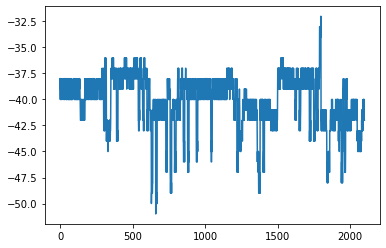

In [130]:
plt.plot(df.RSSI)

In [ ]:
X_train["RSSI"].to_numpy().reshape(-1, 1)

In [ ]:
plot_model(
    nn.model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
def clean(preds):
    res= []
    for pred in preds:
        d0 = abs(pred - 0)
        d1 = abs(pred - 1)
        if d0 < d1:
            res.append(0)
        else:
            res.append(1)
    return res

In [ ]:
from scipy.signal import medfilt
cleaned = clean(nn.predict(testX=X_test))

In [ ]:
accuracy_score(y_test, cleaned)

In [ ]:
cleaned = medfilt(clean(nn.predict(pre.rssi)), 29)

In [ ]:
nn.predict(abs1.rssi)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# forest = AdaBoostClassifier()
# forest.fit(pre1.rssi.to_numpy()[:,np.newaxis], pre1.y)
# predict = forest.predict(pre2.rssi.to_numpy()[:,np.newaxis])
# accuracy_score(pre2.y.to_numpy(), medfilt(predict, kernel_size=13))